<a href="https://colab.research.google.com/github/borrowedbirch05/Fast.AI/blob/main/3vs7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting 3 vs 7

# Imports

In [2]:
#imports

! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━

# Dataset Download

In [74]:
# download Dataset

path = untar_data(URLs.MNIST_SAMPLE)

Path.BASE_PATH = path

path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [75]:
threes = (path/'train'/'3').ls()
sevens = (path/'train'/'7').ls()

# Creating a Baseline

In [76]:
#Pixel Similarity

In [77]:
seven_tensors = [tensor(Image.open(img)) for img in sevens]
three_tensors = [tensor(Image.open(img)) for img in threes]

In [78]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

In [79]:
three_tensors[0].shape

torch.Size([28, 28])

In [80]:
stack = torch.stack(seven_tensors).float()/255

In [81]:
stack

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [82]:
stack_mean = torch.mean(stack, 0)

<Axes: >

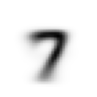

In [83]:
show_image(stack_mean)

In [84]:
def get_average(tensor_list):
  return torch.mean(torch.stack(tensor_list).float()/255, 0)

In [85]:
mean3 = get_average(three_tensors)
mean7 = get_average(seven_tensors)

<Axes: >

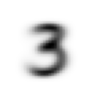

In [86]:
show_image(mean3)

<Axes: >

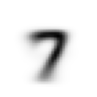

In [87]:
show_image(mean7)

In [88]:
# dist_3_abs = (mean3 - img).abs().mean() # F.l1_loss
# dist_3_sq = ((mean3-img)**2).mean().sqrt() # F.mse_loss.sqrt()

In [89]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [90]:
def mnist_distance(img1, img2):
  return F.l1_loss(img1, img2)

In [91]:
#test
a_3 = stacked_threes[1]
mnist_distance(mean3, a_3.float())

tensor(0.1602)

In [92]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)

<ipython-input-90-31b5723ab835>:2: UserWarning: Using a target size (torch.Size([28, 28])) that is different to the input size (torch.Size([1010, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(img1, img2)


In [93]:
valid_3_dist, valid_3_dist.shape

(tensor(0.1296), torch.Size([]))

In [94]:
def is_3(inp) :
  return mnist_distance(inp, mean3) < mnist_distance(inp, mean7)

In [95]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = 1-is_3(valid_7_tens).float().mean()

<ipython-input-90-31b5723ab835>:2: UserWarning: Using a target size (torch.Size([28, 28])) that is different to the input size (torch.Size([1010, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(img1, img2)
<ipython-input-90-31b5723ab835>:2: UserWarning: Using a target size (torch.Size([28, 28])) that is different to the input size (torch.Size([1028, 28, 28])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(img1, img2)


In [96]:
accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2


(tensor(1.), tensor(1.), tensor(1.))

#Stochastic Gradient Descent

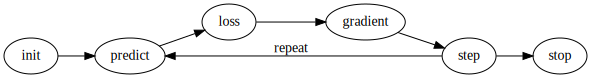

In [97]:

#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [98]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [99]:
train_x.shape

torch.Size([12396, 784])

In [100]:
train_y = tensor([1]*len(threes) + [0]*len(sevens))

In [101]:
train_y.shape

torch.Size([12396])

In [102]:
dset = list(zip(train_x, train_y))

In [103]:
x,y = dset[0]

In [104]:
x.shape, y

(torch.Size([784]), tensor(1))

In [105]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens))
valid_dset = list(zip(valid_x,valid_y))

In [106]:
def init_params(size, std=1.0):
  return (torch.randn(size)*std).requires_grad_()

In [107]:
weights = init_params((28*28, 1))

In [108]:
bias = init_params(1)

In [109]:
(train_x[0]*weights.T).sum() + bias

tensor([0.4191], grad_fn=<AddBackward0>)

In [110]:
def linear(inp) :
  return inp@weights + bias
preds = linear(train_x)

In [111]:
preds.shape

torch.Size([12396, 1])

In [112]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [113]:
# prompt: sigmoid

def sigmoid(x):
  return 1/(1+torch.exp(-x))


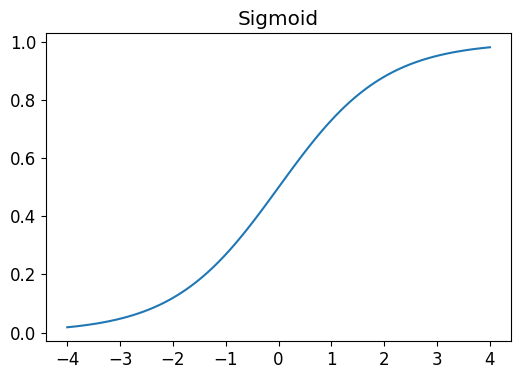

In [114]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)


In [115]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256]))

In [116]:
weights = init_params((28*28,1))
bias = init_params(1)

In [117]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [118]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [119]:
preds = linear(batch)
preds

tensor([[-12.3163],
        [ -4.7524],
        [-13.7611],
        [ -8.3436]], grad_fn=<AddBackward0>)

In [120]:
loss = mnist_loss(preds, train_y[:4])

In [121]:
loss

tensor(0.9978, grad_fn=<MeanBackward0>)

In [122]:
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [123]:
calc_grad(train_x[:4], train_y[:4], linear)

In [124]:
weights.grad.mean()

tensor(-0.0003)

In [125]:
def train_epoch(model, lr, params):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [126]:
#accuracy

def batch_accuracy(preds, targets):
  preds = preds.sigmoid()
  corrects = (preds > 0.5) == targets
  return corrects.float().mean()

In [127]:
#test
batch_accuracy(linear(batch), train_y[:4])

tensor(0.)

In [128]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [129]:
validate_epoch(linear)

0.2847

In [130]:
lr=1.
params = weights, bias
train_epoch(linear, lr, params)
validate_epoch(linear)

0.5686

In [131]:
for i in range(20):
  train_epoch(linear, lr, params)
  print(validate_epoch(linear), end=' ')

0.7976 0.9029 0.932 0.9422 0.9461 0.9503 0.9513 0.9551 0.9566 0.9584 0.9584 0.9594 0.9594 0.9598 0.9598 0.9612 0.9612 0.9612 0.9621 0.9621 

# Using Pytorch optimizers

In [132]:
linear_model = nn.Linear(28*28, 1)
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [133]:
class BasicOptimizer:
  def __init__(self, params, lr):
    self.params,self.lr = list(params),lr

  def step(self, *args, **kwargs):
    for p in self.params: p.data -= p.grad.data * self.lr

  def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None


In [134]:
opt = BasicOptimizer(linear_model.parameters(), lr)

In [135]:
# def train_epoch(model, lr, params):
#   for xb, yb in dl:
#     calc_grad(xb, yb, model)
#     for p in params:
#       p.data -= p.grad*lr
#       p.grad.zero_()

def train_epoch(model):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    opt.step()
    opt.zero_grad()

In [136]:
def train_model(model, epoch):
  for i in range(epoch):
    train_epoch(model)
    print(validate_epoch(model), end=' ')

In [137]:
train_model(linear_model, 20)


0.4932 0.7124 0.8393 0.9043 0.9247 0.9386 0.9496 0.9533 0.9561 0.9571 0.9585 0.9608 0.9613 0.9623 0.9638 0.9638 0.9643 0.9661 0.9661 0.9666 

# Using FastAI Libraries

In [67]:
# class BasicOptimizer:
#   def __init__(self, params, lr):
#     self.params,self.lr = list(params),lr

#   def step(self, *args, **kwargs):
#     for p in self.params: p.data -= p.grad.data * self.lr

#   def zero_grad(self, *args, **kwargs):
#         for p in self.params: p.grad = None

# opt = BasicOptimizer(linear_model.parameters(), lr)

opt = SGD(linear_model.parameters(), lr)

In [68]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.6747 0.8475 0.9057 0.9262 0.9401 0.9505 0.9542 0.9556 0.9571 0.9581 0.9604 0.9613 0.9628 0.9638 0.9643 0.9647 0.9647 0.9656 0.9656 

In [69]:
dls = DataLoaders(dl, valid_dl)

In [70]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func = mnist_loss, metrics=batch_accuracy)
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636233,0.502455,0.495584,00:00
1,0.347199,0.297026,0.711030,00:00
2,0.136141,0.173551,0.844218,00:00
3,0.064617,0.111152,0.902800,00:00
4,0.038303,0.085367,0.924344,00:00
5,0.028118,0.071093,0.938796,00:00
6,0.023824,0.062050,0.949759,00:00
7,0.021760,0.056070,0.954068,00:00
8,0.020601,0.051957,0.955433,00:00
9,0.019847,0.048985,0.956905,00:00


In [71]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [72]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(40, 0.1)


epoch,train_loss,valid_loss,batch_accuracy,time
0,0.344662,0.413451,0.504907,00:00
1,0.157146,0.241558,0.792191,00:00
2,0.086272,0.124853,0.906235,00:00
3,0.056609,0.088104,0.929197,00:00
4,0.043175,0.071830,0.944630,00:00
5,0.036380,0.062805,0.951178,00:00
6,0.032471,0.057128,0.953961,00:00
7,0.029924,0.053261,0.953961,00:00
8,0.028099,0.050451,0.955870,00:00
9,0.026700,0.048305,0.956797,00:00


In [73]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.089063,0.008614,0.997056,00:19
